Epoch 1/1500
23/23 [==============================] - 0s 5ms/step - loss: 0.9168 - accuracy: 0.5112 - val_loss: 0.8640 - val_accuracy: 0.5195
Epoch 2/1500
23/23 [==============================] - 0s 1ms/step - loss: 0.8446 - accuracy: 0.5112 - val_loss: 0.8050 - val_accuracy: 0.5195
Epoch 3/1500
23/23 [==============================] - 0s 1ms/step - loss: 0.7920 - accuracy: 0.5112 - val_loss: 0.7598 - val_accuracy: 0.5195
Epoch 4/1500
23/23 [==============================] - 0s 1ms/step - loss: 0.7517 - accuracy: 0.5112 - val_loss: 0.7297 - val_accuracy: 0.5195
Epoch 5/1500
23/23 [==============================] - 0s 1ms/step - loss: 0.7251 - accuracy: 0.5112 - val_loss: 0.7099 - val_accuracy: 0.5195
Epoch 6/1500
23/23 [==============================] - 0s 1ms/step - loss: 0.7082 - accuracy: 0.5112 - val_loss: 0.6979 - val_accuracy: 0.5195
Epoch 7/1500
23/23 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.5112 - val_loss: 0.6901 - val_accuracy: 0.5195
Epoch 

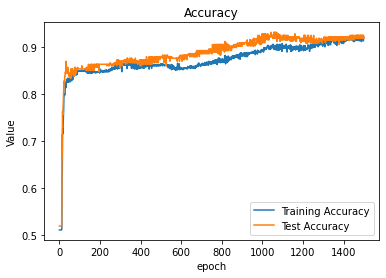

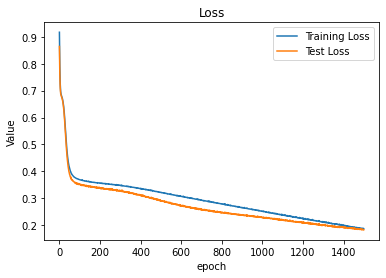

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       148
           1       1.00      0.96      0.98       160

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

[[148   0]
 [  6 154]]


In [3]:
# Import library
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing


from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Load dataset
dataset = pd.read_csv("heart.csv")

#Read target column as y
y=dataset.target

#Take all of column and drop target column as x
x=dataset.drop('target',axis=1)


min_max_scaler = preprocessing.MinMaxScaler() #Normalizing data to value from 0-1
x_scaled = min_max_scaler.fit_transform(x)

# Split data into training and test 
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=4)



# Define the keras model
model = Sequential()

#First hidden layer with 10 neuron, 13 input (using sigmoid activation function)
model.add(Dense(10, input_shape=(13,), activation='sigmoid'))

#Second hidden layer with 10 neuron (using sigmoid activation function)
model.add(Dense(10, activation='sigmoid'))

#Output layer with 1 neuron (using sigmoid activation function)
model.add(Dense(1, activation='sigmoid'))


# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

trained = model.fit(X_train, y_train, epochs=1500, batch_size=32, validation_data=(X_test, y_test))

#evaluate the keras model
_,accuracy = model.evaluate(X_train, y_train)

print('Accuracy: %.2f' % (accuracy*100))

#Plotting accuracy and loss chart
plt.plot(trained.history['accuracy'] )
plt.plot(trained.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['Training Accuracy' , 'Test Accuracy'], loc='lower right')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])

plt.title('Loss')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['Training Loss' , 'Test Loss'], loc='upper right')
plt.show()


#Tak faham coding ni tapi aku rembat lol
classifier_tree = DecisionTreeClassifier()
y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

In [5]:

predictions = (model.predict(X_train) > 0.5).astype(int)
for i in range(500):
    if predictions[i] == y[i]:
        print('[%d] %s => %d (expected %d) BETUL' % (i,X_train[i].tolist(), predictions[i], y[i]))
    else:
        print('[%d] %s => %d (expected %d) SALAH' % (i,X_train[i].tolist(), predictions[i], y[i]))

23/23 [==============================] - 0s 409us/step
[0] [0.25, 0.0, 0.3333333333333333, 0.339622641509434, 0.1780821917808219, 0.0, 0.0, 0.7709923664122137, 0.0, 0.2258064516129032, 1.0, 0.0, 0.6666666666666666] => 1 (expected 0) SALAH
[1] [0.8124999999999999, 1.0, 0.6666666666666666, 0.2264150943396227, 0.34474885844748854, 0.0, 0.5, 0.6106870229007634, 0.0, 0.16129032258064516, 1.0, 0.25, 1.0] => 0 (expected 0) BETUL
[2] [0.6874999999999999, 0.0, 0.0, 0.4339622641509434, 0.6118721461187213, 0.0, 0.0, 0.6564885496183205, 0.0, 0.1935483870967742, 0.5, 0.0, 0.6666666666666666] => 1 (expected 0) SALAH
[3] [0.6041666666666666, 0.0, 1.0, 0.5283018867924528, 0.3584474885844749, 1.0, 0.0, 0.6946564885496184, 0.0, 0.16129032258064516, 1.0, 0.0, 0.6666666666666666] => 1 (expected 0) SALAH
[4] [0.6249999999999999, 0.0, 0.0, 0.7547169811320754, 0.28082191780821913, 0.0, 0.5, 0.5496183206106869, 1.0, 0.0, 0.5, 0.0, 0.6666666666666666] => 0 (expected 0) BETUL
[5] [0.7499999999999999, 1.0, 0.0, 